# Final Project

**Due date: Saturday, December 9th**

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

In [ ]:
library('tidyverse')
install.packages('lubridate')
library('lubridate')

In [56]:

big_tech_stock_prices <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_stock_prices.csv')
big_tech_companies <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_companies.csv')

big_tech_companies |> head()
big_tech_stock_prices |> head()

Rows: 45088 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): stock_symbol
dbl  (6): open, high, low, close, adj_close, volume
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 14 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): stock_symbol, company

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


stock_symbol,company
<chr>,<chr>
AAPL,Apple Inc.
ADBE,Adobe Inc.
AMZN,"Amazon.com, Inc."
CRM,"Salesforce, Inc."
CSCO,"Cisco Systems, Inc."
GOOGL,Alphabet Inc.


stock_symbol,date,open,high,low,close,adj_close,volume
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
AAPL,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.396483,462229600


In [13]:
four_price = big_tech_stock_prices |> 
    filter(stock_symbol==c('AAPL', 'TSLA', 'META', 'GOOGL'))

four_price |> head()
#aapl_tsla_price |> tail()

stock_symbol,date,open,high,low,close,adj_close,volume
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
AAPL,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.375781,432894000
AAPL,2010-01-21,7.574286,7.618214,7.400357,7.431071,6.334377,608154400
AAPL,2010-01-27,7.387500,7.520714,7.126071,7.424286,6.328594,1722568400
AAPL,2010-02-02,6.996786,7.011429,6.906429,6.995000,5.962664,698342400


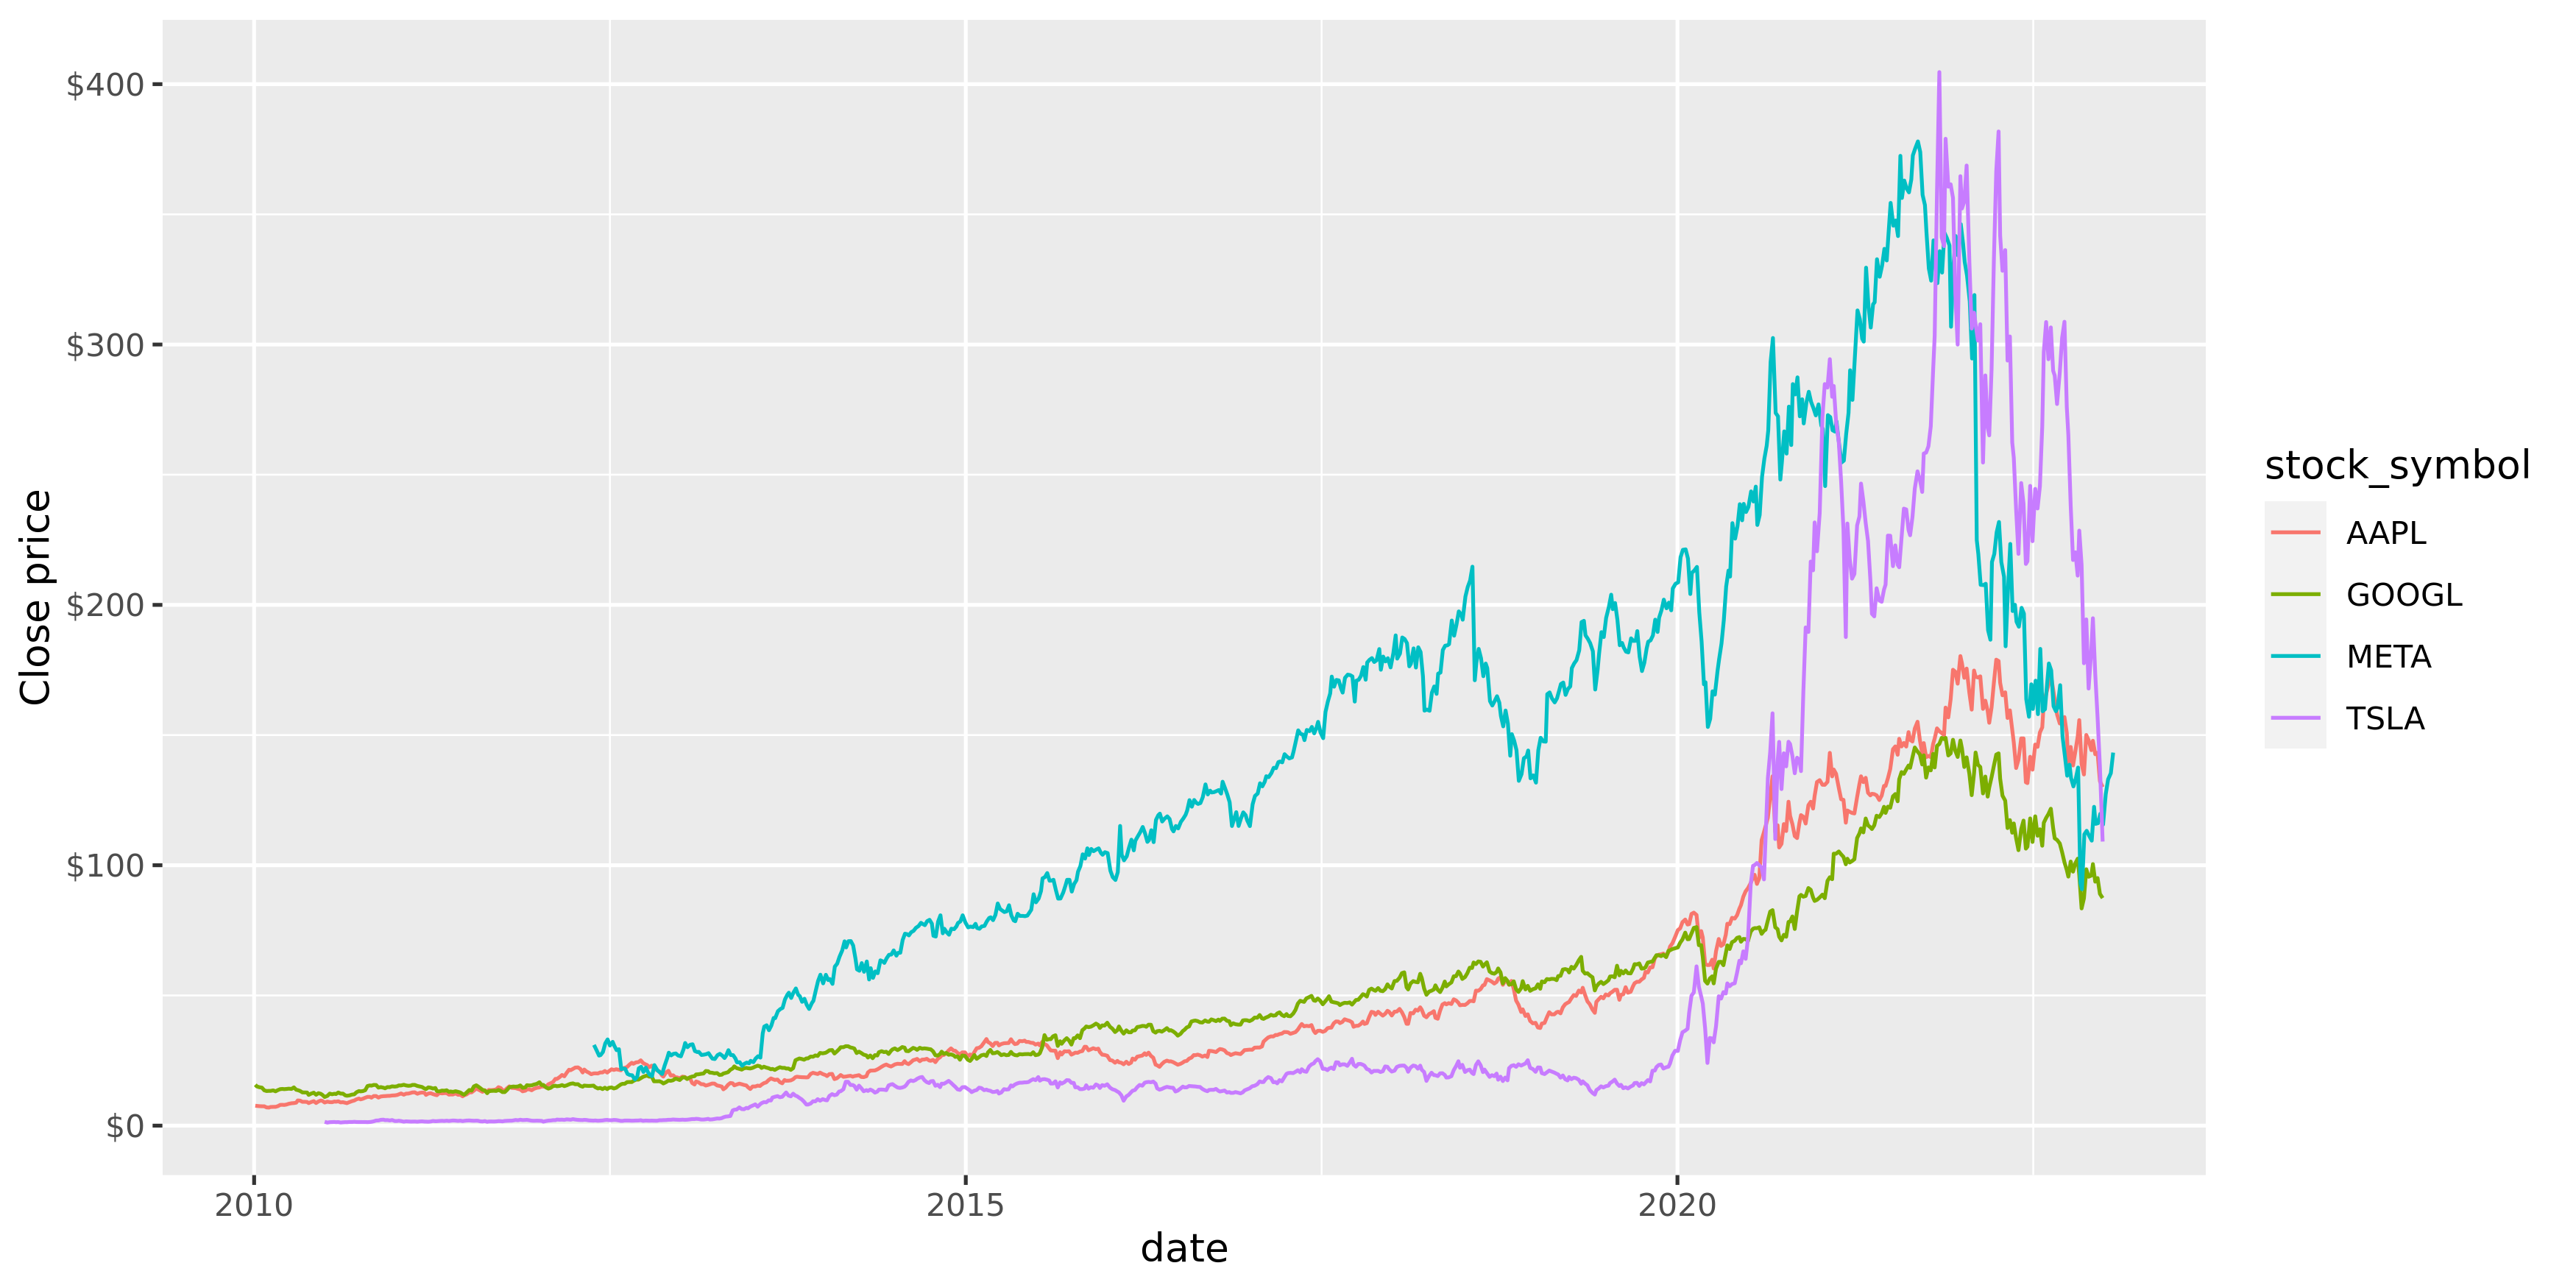

In [14]:
options(repr.plot.res = 350, repr.plot.width = 10, repr.plot.height = 5)

p = ggplot(four_price, aes(x = date, y = close, color = stock_symbol )) +
    geom_line() +
    scale_y_continuous(labels = scales::dollar_format()) + labs(y = 'Close price')

p

In [64]:
date = ymd(big_tech_stock_prices$date)

In [80]:
max_price = big_tech_stock_prices |> 
    mutate(Year = year(date)) |>
    group_by(stock_symbol, Year) |> 
    summarize(maxprice = max(high))

max_price |> head()

`summarise()` has grouped output by 'stock_symbol'. You can override using the
`.groups` argument.


stock_symbol,Year,maxprice
<chr>,<dbl>,<dbl>
AAPL,2010,11.66643
AAPL,2011,15.23929
AAPL,2012,25.18107
AAPL,2013,20.54071
AAPL,2014,29.93750
AAPL,2015,33.63500


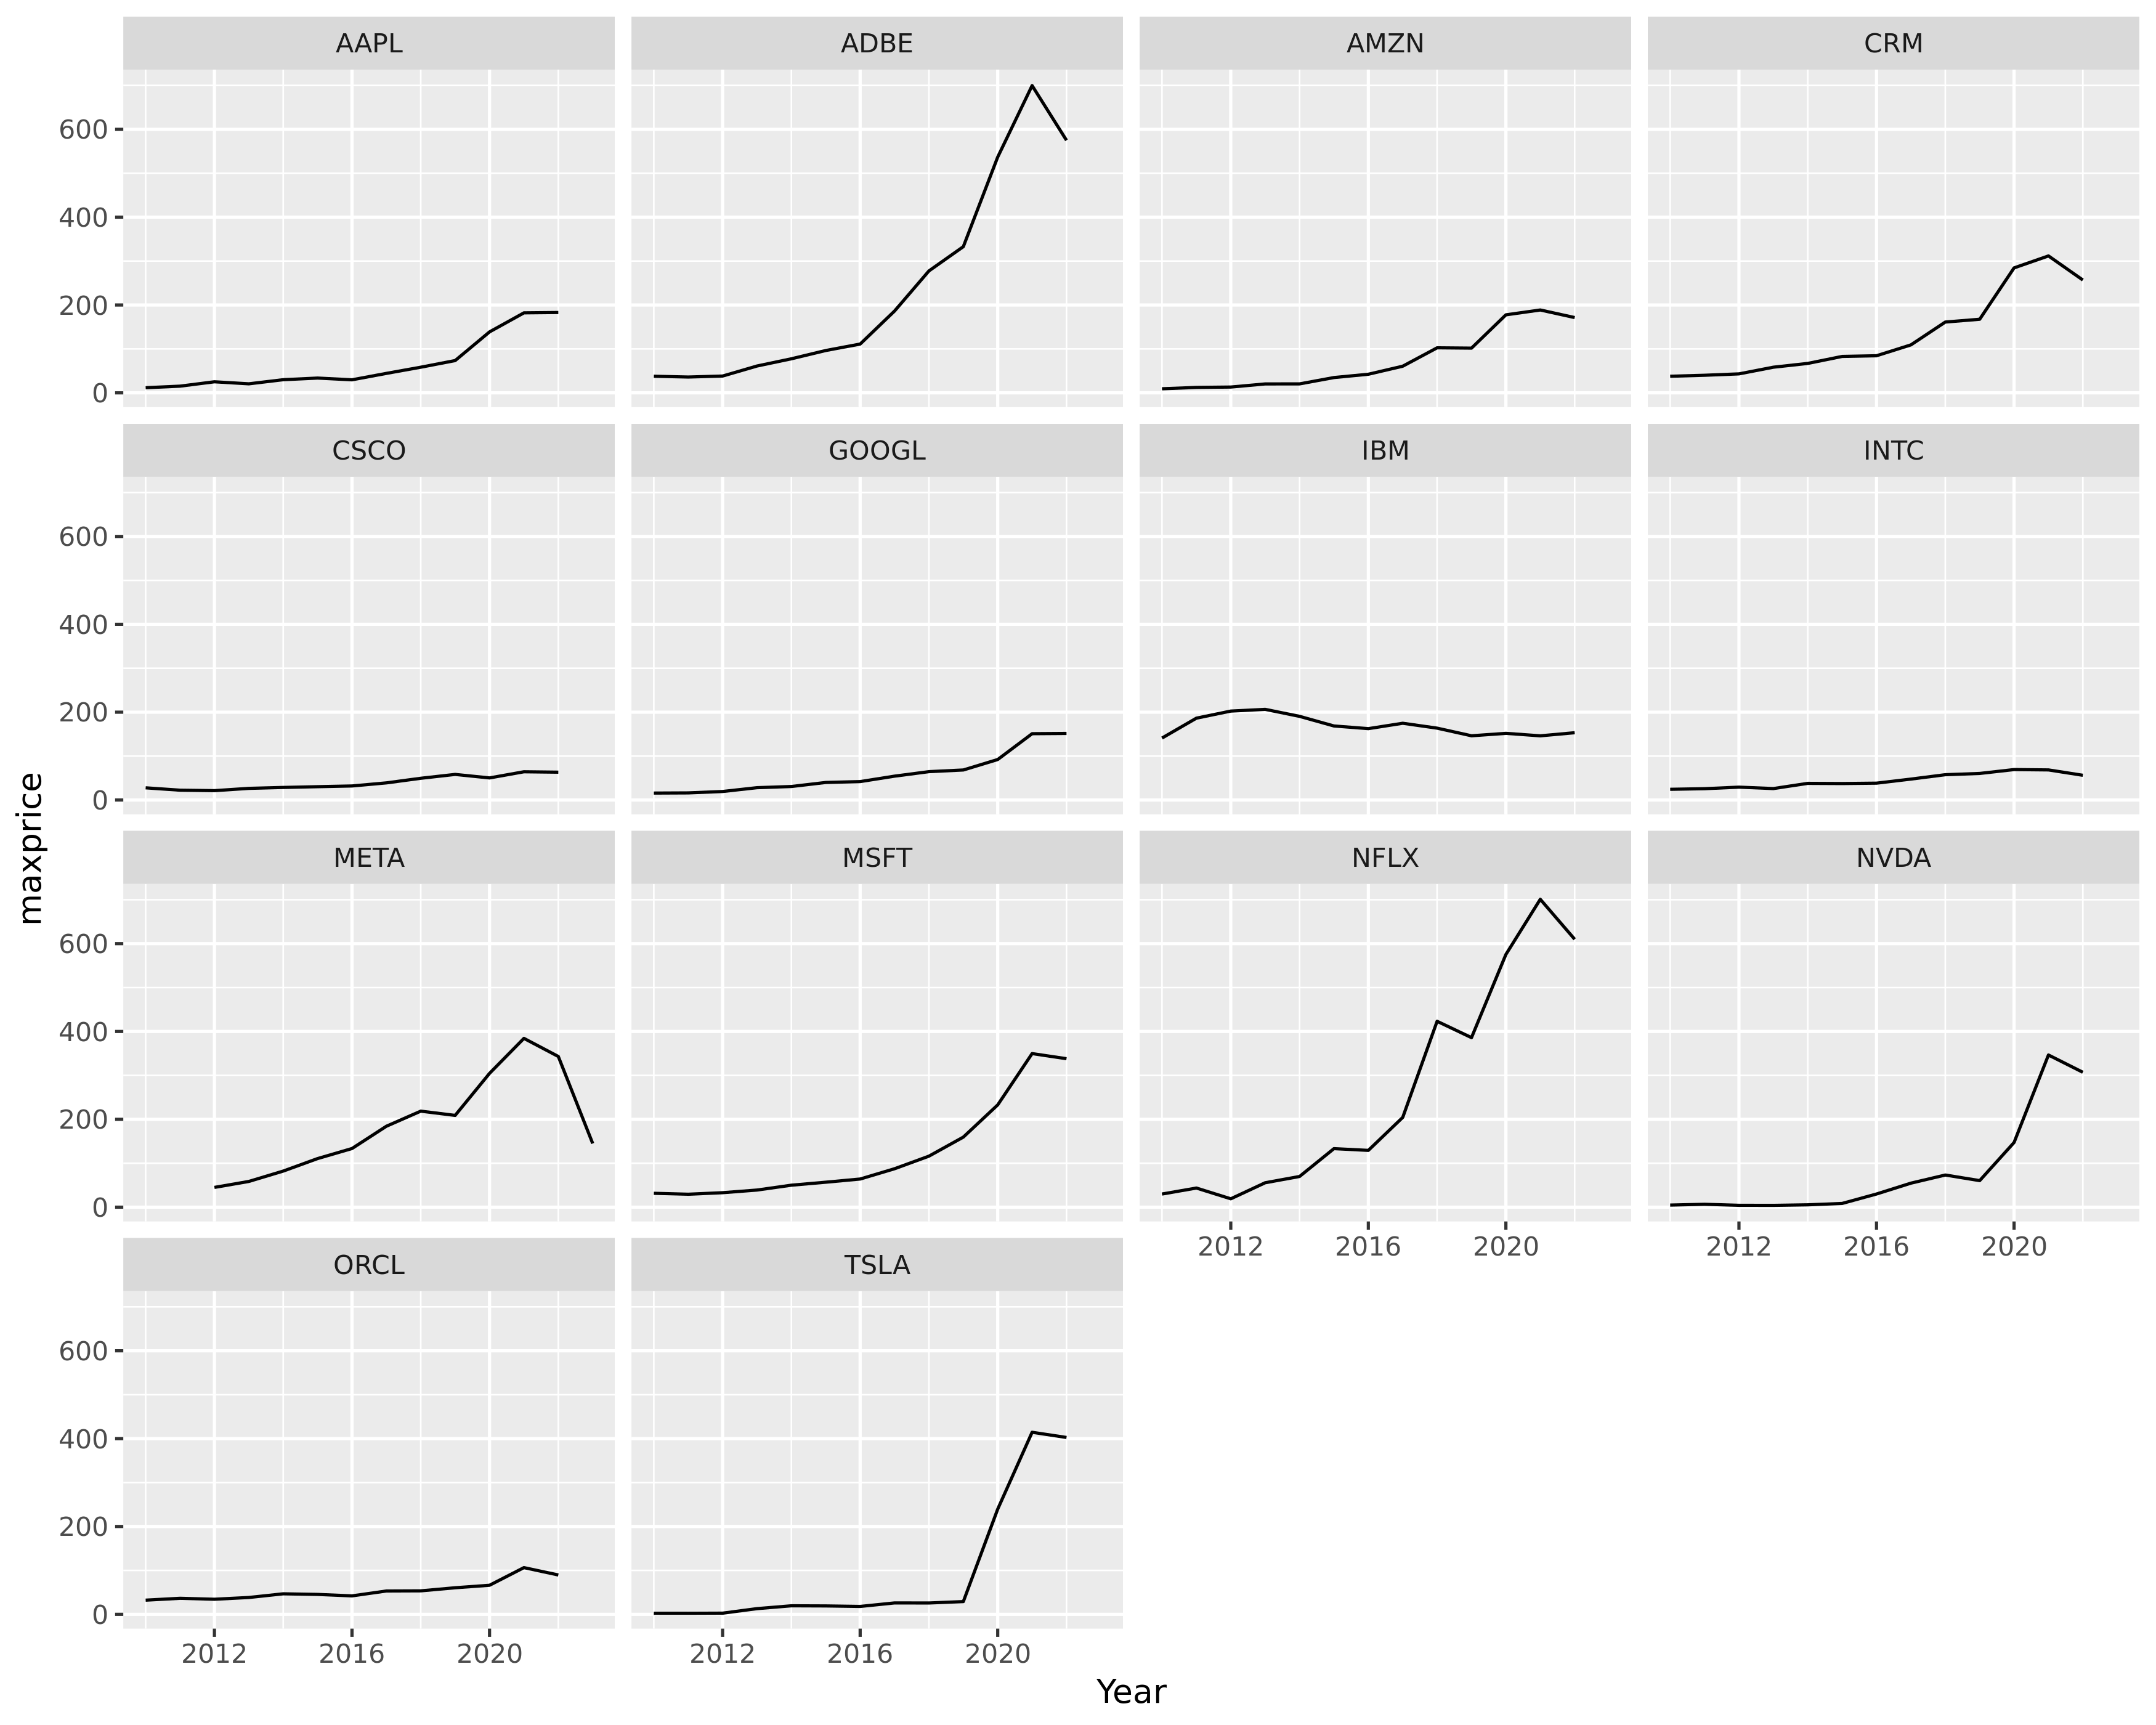

In [93]:
options(repr.plot.res = 350, repr.plot.width = 10, repr.plot.height = 8)
p = ggplot(max_price, aes(x=Year, y=maxprice)) + 
    geom_line() +
    facet_wrap(~stock_symbol)

p